# Filters for freshwater lens and statistics

> Freshwater profiles are filtered using a reference value chosen_vertical_position in meters. Then, basic statistics are calculated, and a figure with boxplots is displayed.

---

## Import libraries

In [1]:
import sys
import os

root = os.path.abspath('..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from modules import processing, load, plots, analysis

c:\Users\Mariana\Documents\freshwater_lens\modules\analysis.py:257: SyntaxWarning: invalid escape sequence '\('
  """


---

## Steps to Execute  

1. You only need to select between `raw` and `rawdy` in the `data_to_filter` variable to properly        configure the environment as needed.  
If you need to filter data other than `raw` or `rawdy`, you can add the configurations to the conditional block below.

In [2]:
data_to_filter = 'raw' # Or 'rawdy'

In [3]:
if data_to_filter == 'raw':
    input_path_processing = f'{root}/data/raw'
    output_path_processing = f'{root}/data/raw_filter'
    required_columns_processing = ['Vertical Position m','Corrected sp Cond [µS/cm]']
elif data_to_filter == 'rawdy':
    input_path_processing = f'{root}/data/rawdy'
    output_path_processing = f'{root}/data/rawdy_filter'
    required_columns_processing = ['Vertical Position [m]','Corrected sp Cond [uS/cm]']

---

## Load data


In [4]:
path_csv = f'{root}/data/fwl_map/fwl_2023_TW.csv'

df_file_name = pd.read_csv(path_csv)


# Transform 
df_file_name = df_file_name.rename(columns={'nombre_perfil': 'name_file', 
                                            'vertical_position': 'chosen_vertical_position'})

df_file_name['name_file'] = df_file_name['name_file'].str.replace(' ', '')

df_file_name

,name_file,chosen_vertical_position,n_breakpoint_fake,Unnamed: 3,Unnamed: 4
0,AW1D_YSI_20230826,16.769107,2,NaN,NaN
1,AW2D_YSI_20230815,11.956483,2,NaN,NaN
2,AW5D_YSI_20230824,13.275873,2,NaN,NaN
3,AW6D_YSI_20230815,15.657264,2,NaN,NaN
4,AW7D_YSI_20230814,13.505295,2,NaN,NaN
5,BW1D_YSI_20230824,14.109820,2,NaN,NaN
6,BW2D_YSI_20230819,14.725409,2,NaN,NaN
7,BW3D_YSI_20230818,13.182247,2,NaN,NaN
8,BW4D_YSI_20230816,14.125826,2,NaN,NaN
9,BW5D_YSI_20230822,12.125164,2,NaN,NaN


---

## Filter data

PRECAUTIONS:

If you run this cell more than once, make sure to reload the data, or there will be issues.

In [5]:
if data_to_filter == 'rawdy':
    df_file_name['name_file'] = df_file_name['name_file'] + '_rowdy'

df_file_name['name_file'] = df_file_name['name_file'] + '.csv'

df_file_name

,name_file,chosen_vertical_position,n_breakpoint_fake,Unnamed: 3,Unnamed: 4
0,AW1D_YSI_20230826.csv,16.769107,2,NaN,NaN
1,AW2D_YSI_20230815.csv,11.956483,2,NaN,NaN
2,AW5D_YSI_20230824.csv,13.275873,2,NaN,NaN
3,AW6D_YSI_20230815.csv,15.657264,2,NaN,NaN
4,AW7D_YSI_20230814.csv,13.505295,2,NaN,NaN
5,BW1D_YSI_20230824.csv,14.109820,2,NaN,NaN
6,BW2D_YSI_20230819.csv,14.725409,2,NaN,NaN
7,BW3D_YSI_20230818.csv,13.182247,2,NaN,NaN
8,BW4D_YSI_20230816.csv,14.125826,2,NaN,NaN
9,BW5D_YSI_20230822.csv,12.125164,2,NaN,NaN


In [6]:
processing.filter_csv_by_vertical_position(
    df_file_name,
    input_path=input_path_processing, 
    output_path=output_path_processing,
    required_columns=required_columns_processing
)

[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\AW1D_YSI_20230826_filter.csv'
[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\AW2D_YSI_20230815_filter.csv'
[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\AW5D_YSI_20230824_filter.csv'
[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\AW6D_YSI_20230815_filter.csv'
[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\AW7D_YSI_20230814_filter.csv'
[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\BW1D_YSI_20230824_filter.csv'
[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\BW2D_YSI_20230819_filter.csv'
[Info] Processed and saved file: 'c:\Users\Mariana\Documents\freshwater_lens/data/raw_filter\BW3D_YSI_20230818_filter.csv'
[Info] Processed

---

## Basic statistics

In [7]:
analysis.statistics_csv_files(input_folder=output_path_processing,
                           output_folder=f'{root}/data',
                           name_folder=data_to_filter,
                           target_column=required_columns_processing[1]
                           )

Statistics have been successfully saved to 'c:\Users\Mariana\Documents\freshwater_lens/data\statistics_profiles_raw.csv'.


,filename,mean,std,cv,min,max,median,25%,50%,75%,iqr
0,AW1D_YSI_20230826_filter.csv,1555.707669,159.884806,0.102773,1296.5,3104.0,1539.40,1482.600,1539.40,1563.500,80.900
1,AW2D_YSI_20230815_filter.csv,488.372345,149.147269,0.305397,389.0,1059.2,438.20,408.425,438.20,463.275,54.850
2,AW5D_YSI_20230824_filter.csv,754.182971,161.641223,0.214326,685.1,1608.7,703.00,689.000,703.00,707.700,18.700
3,AW6D_YSI_20230815_filter.csv,918.497925,844.458636,0.919391,95.8,3713.3,448.20,433.400,448.20,1219.050,785.650
4,AW7D_YSI_20230814_filter.csv,569.777315,345.385939,0.606177,329.1,2274.0,517.20,334.700,517.20,518.100,183.400
5,BW10D_YSI_20230825_filter.csv,2023.382375,1634.649115,0.807879,1275.9,9283.6,1294.20,1285.400,1294.20,1384.150,98.750
6,BW11D_YSI_20230823_filter.csv,547.266622,377.537946,0.689861,452.3,4488.4,469.45,463.600,469.45,474.200,10.600
7,BW1D_YSI_20230824_filter.csv,2871.713073,266.560173,0.092823,2467.9,3541.7,3032.80,2522.600,3032.80,3036.100,513.500
8,BW2D_YSI_20230819_filter.csv,720.174706,347.266541,0.482198,382.9,2760.8,710.10,440.900,710.10,714.100,273.200
9,BW3D_YSI_20230818_filter.csv,648.571057,417.447663,0.643642,488.8,4562.1,515.60,512.800,515.60,538.900,26.100


---

## Boxplots

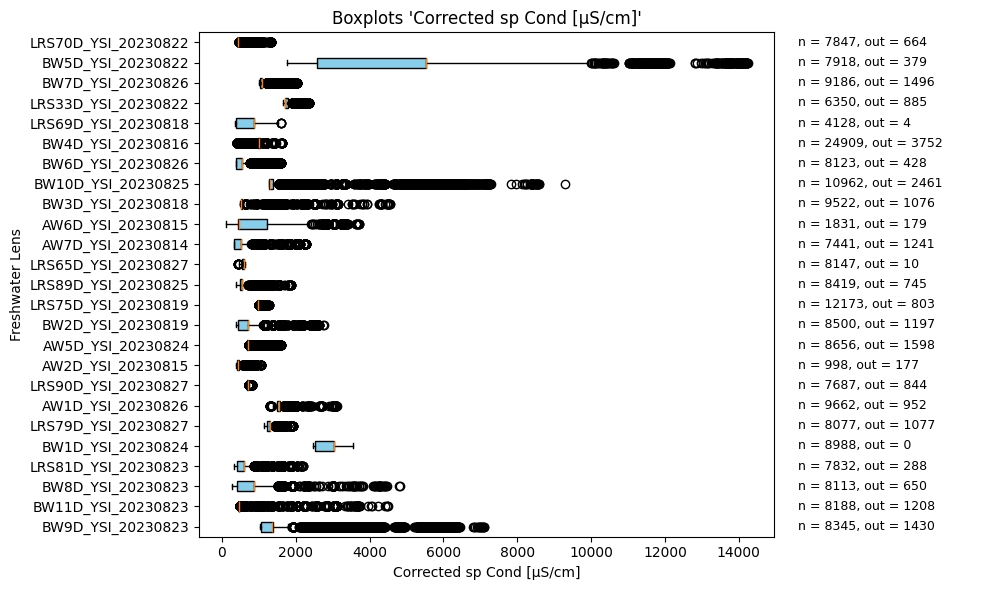

In [8]:
files_to_plot = [
    "BW9D_YSI_20230823_filter.csv", 
    "BW11D_YSI_20230823_filter.csv",
    "BW8D_YSI_20230823_filter.csv",
    "LRS81D_YSI_20230823_filter.csv",
    "BW1D_YSI_20230824_filter.csv",
    "LRS79D_YSI_20230827_filter.csv",
    "AW1D_YSI_20230826_filter.csv",
    "LRS90D_YSI_20230827_filter.csv",
    "AW2D_YSI_20230815_filter.csv",
    "AW5D_YSI_20230824_filter.csv",
    "BW2D_YSI_20230819_filter.csv",
    "LRS75D_YSI_20230819_filter.csv",
    "LRS89D_YSI_20230825_filter.csv",
    "LRS65D_YSI_20230827_filter.csv",
    "AW7D_YSI_20230814_filter.csv",
    "AW6D_YSI_20230815_filter.csv",
    "BW3D_YSI_20230818_filter.csv",
    "BW10D_YSI_20230825_filter.csv",
    "BW6D_YSI_20230826_filter.csv",
    "BW4D_YSI_20230816_filter.csv",
    "LRS69D_YSI_20230818_filter.csv",
    "LRS33D_YSI_20230822_filter.csv",
    "BW7D_YSI_20230826_filter.csv",
    "BW5D_YSI_20230822_filter.csv",
    "LRS70D_YSI_20230822_filter.csv",
]


fig = plots.plot_freshwater_boxplots(input_path=output_path_processing,
                                  filenames=files_to_plot,
                                  show_outliers=True,
                                  target_column=required_columns_processing[1]
                                  )
